In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npy

df = pd.read_csv('../Projektdatensaetze/2023/Fahrradzaehlstellen2023_stuendlich_RENAMED.csv',
                 sep=';')
df['time'] = pd.to_datetime(df['time'], format='%d.%m.%Y %H:%M')
df['days'] = df['time'].dt.date

In [207]:
import matplotlib.gridspec as gridspec

def plot(header):
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 
              'brown', 'pink', 'gray', 'olive', 'teal', 'navy', 'lime', 'gold', 'violet', 'blue']
    
    all_dates = pd.date_range(start=df['days'].min(), end=df['days'].max())
    
    if header != 'time' and header != 'days':
        fig = plt.figure(figsize=(8, 6))
        gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])  # 2 Zeilen, Plot 3/4 und Tabelle 1/4

        ax = plt.subplot(gs[0])  # Plot in der oberen Zeile
        
        # Plot der Daten
        x_values_per_day = df.groupby('days')[header].sum()
        x_values_per_day = x_values_per_day.reindex(all_dates, fill_value=None)
        ax.plot(x_values_per_day, color=colors[df.columns.get_loc(header)], label='Anzahl')

        # Zellen für die Tabelle
        x_values_per_hour = df[header]
        cells_per_hour = [x_values_per_hour.mean(), x_values_per_hour.median(),
                          x_values_per_hour.std(), x_values_per_hour.min(), x_values_per_hour.max()]

        cells_per_day = [x_values_per_day.mean(), x_values_per_day.median(), 
                         x_values_per_day.std(), x_values_per_day.min(), x_values_per_day.max()]

        # Runde die Werte für die Tabelle
        cells_per_hour = [round(value, 2) for value in cells_per_hour]
        cells_per_day = [round(value, 2) for value in cells_per_day]

        # Tabellenüberschriften
        titles = ['Mittelwert', 'Median', 'Standardabw.', 'Min', 'Max']

        # Tabelle in der unteren Zeile
        ax_table = plt.subplot(gs[1])  # Leere Achse, um die Tabelle zu setzen
        ax_table.axis('off')  # Achsen ausschalten, da nur die Tabelle angezeigt wird

        # Tabelle erstellen
        table = ax_table.table(cellText=[cells_per_hour, cells_per_day], rowLabels=['pro Stunde', 'pro Tag'],
                               colLabels=titles, loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.5)

        # Achsentitel und Legende für den Plot
        ax.set_title(header)
        ax.set_xlabel('Tag')
        ax.set_ylabel('Überquerungen mit dem Fahrrad')
        ax.legend()

        # Plot anzeigen
        plt.tight_layout()
        plt.show()


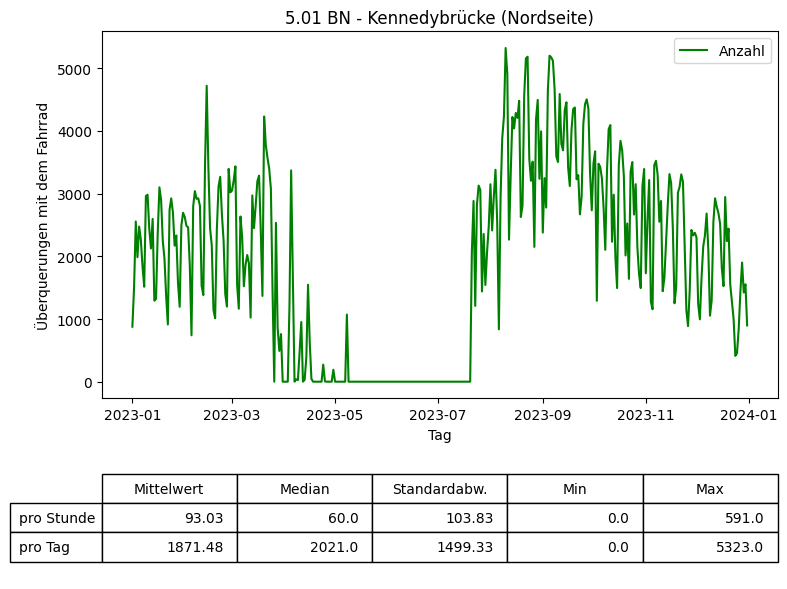

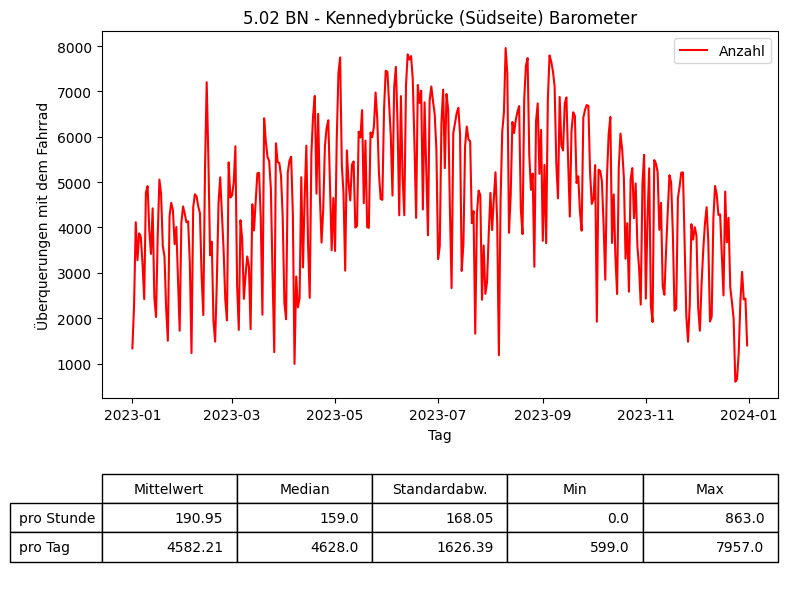

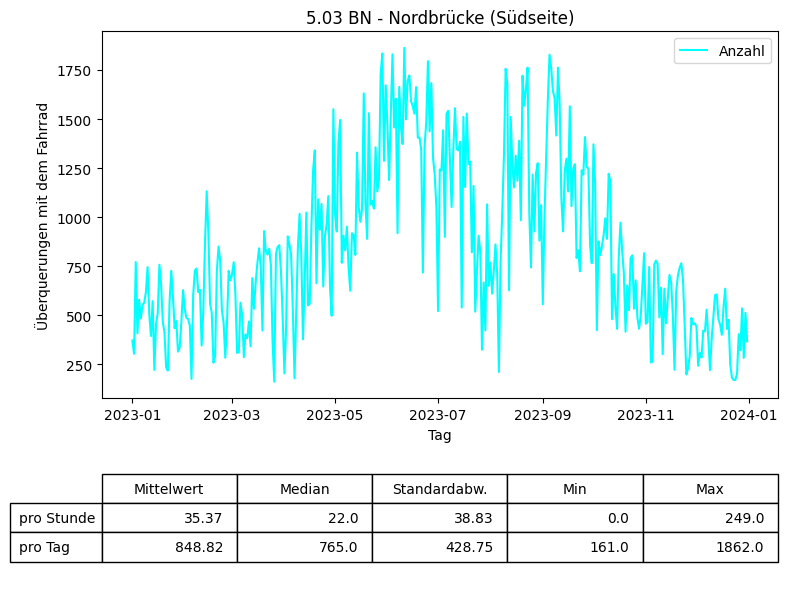

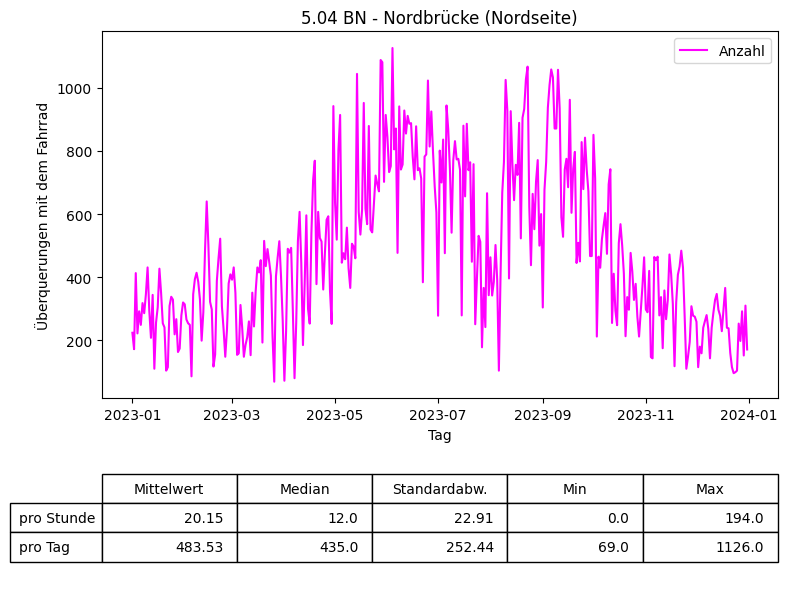

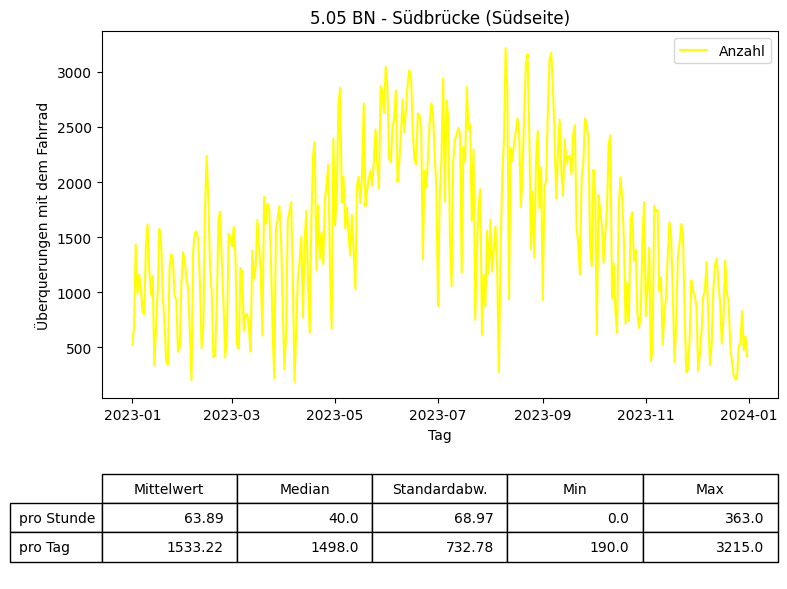

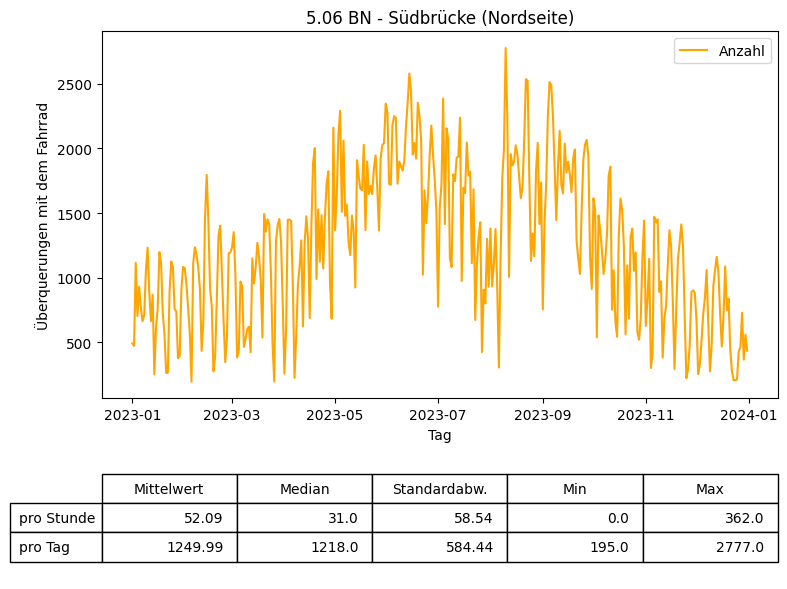

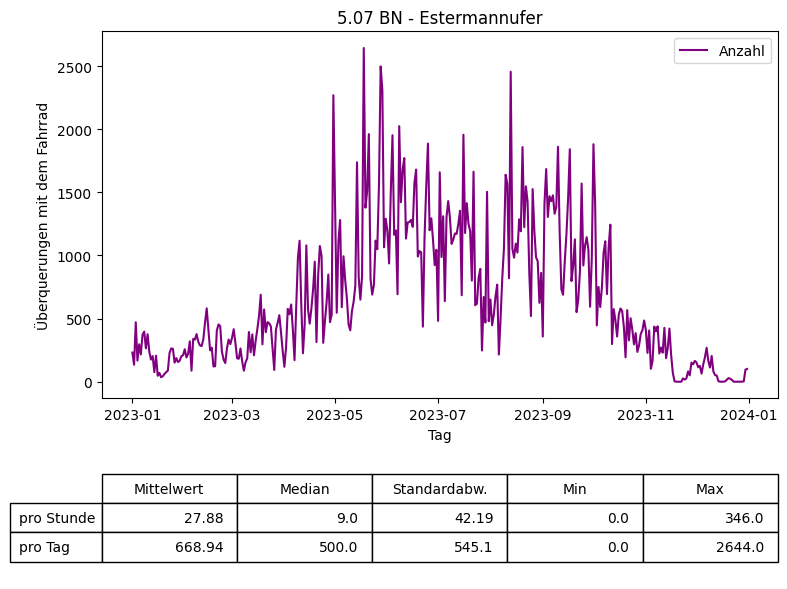

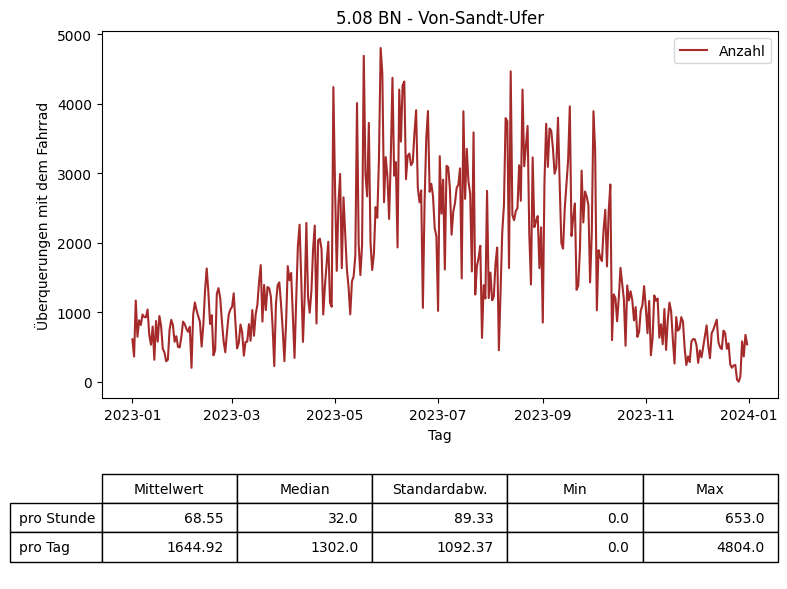

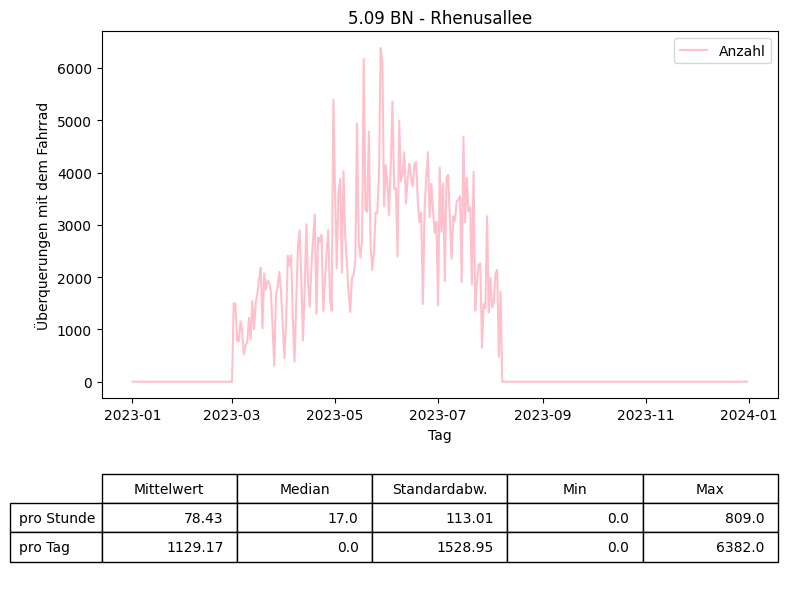

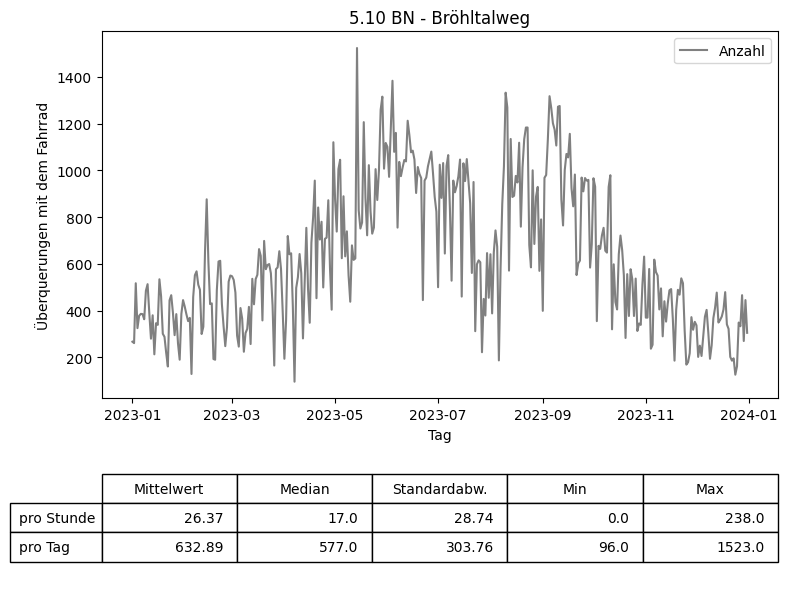

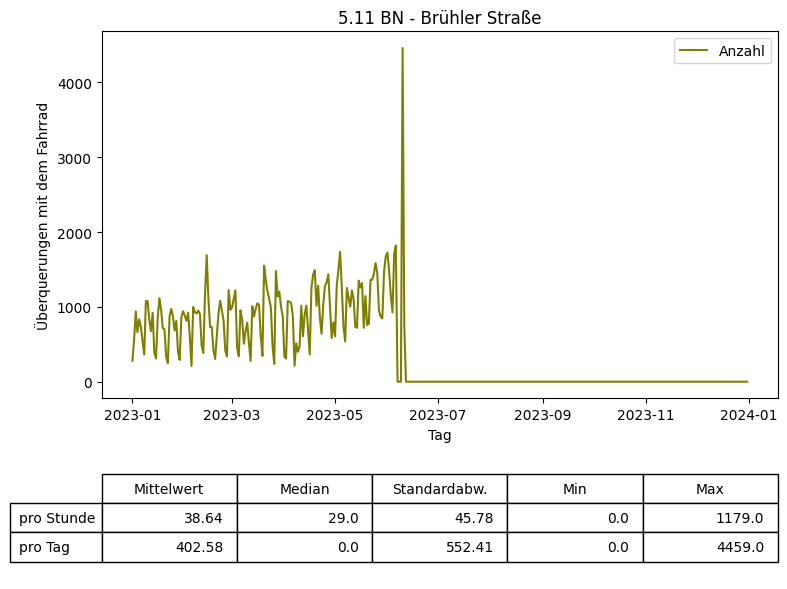

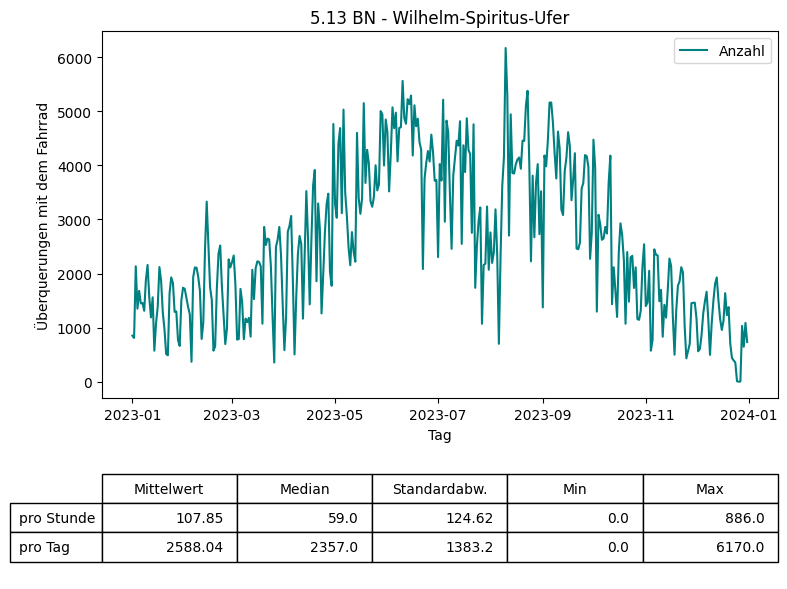

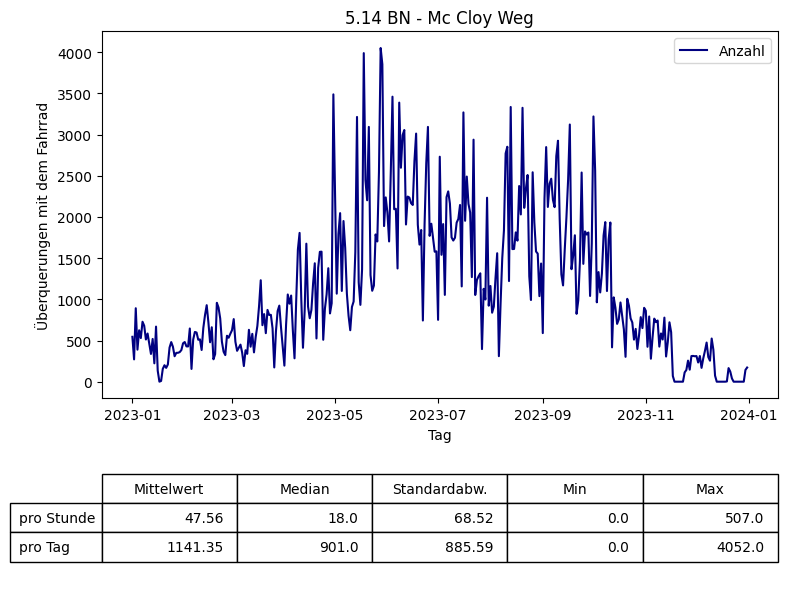

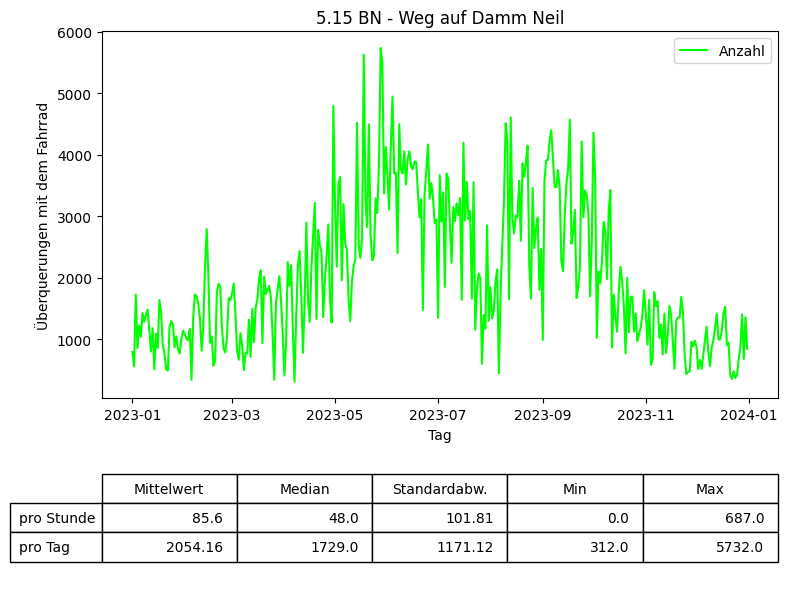

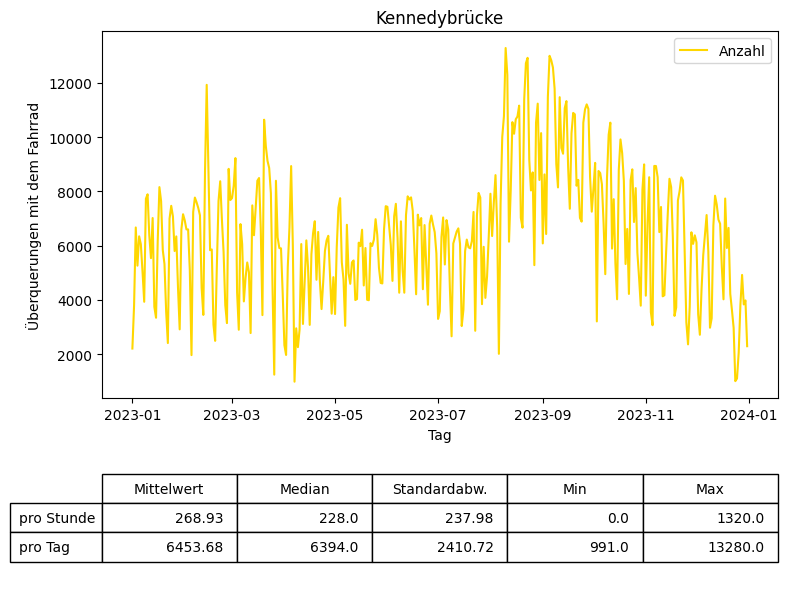

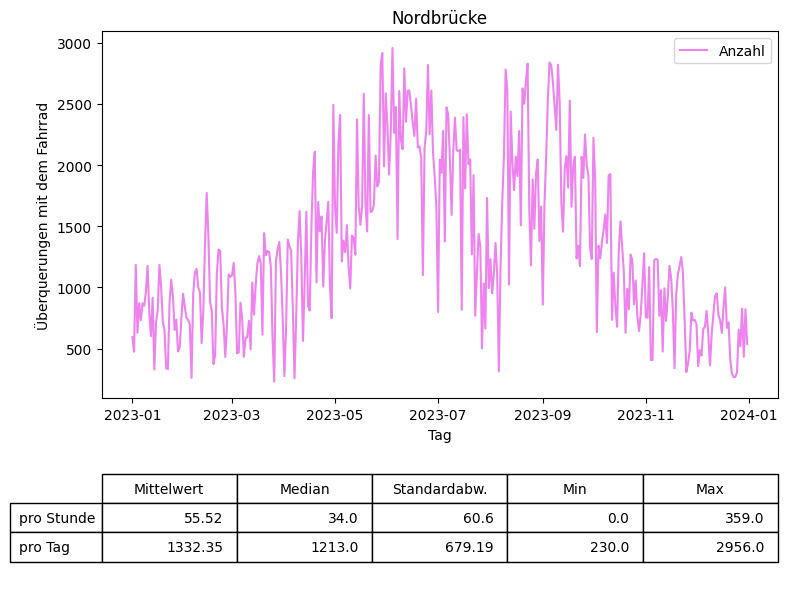

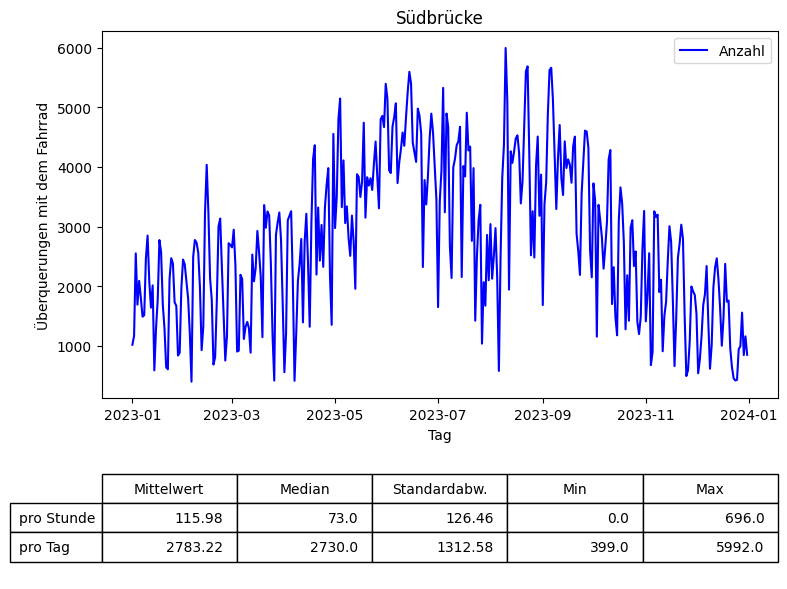

In [208]:
#fasse jeden Tag zusammen
for name in df.columns:
    plot(name)

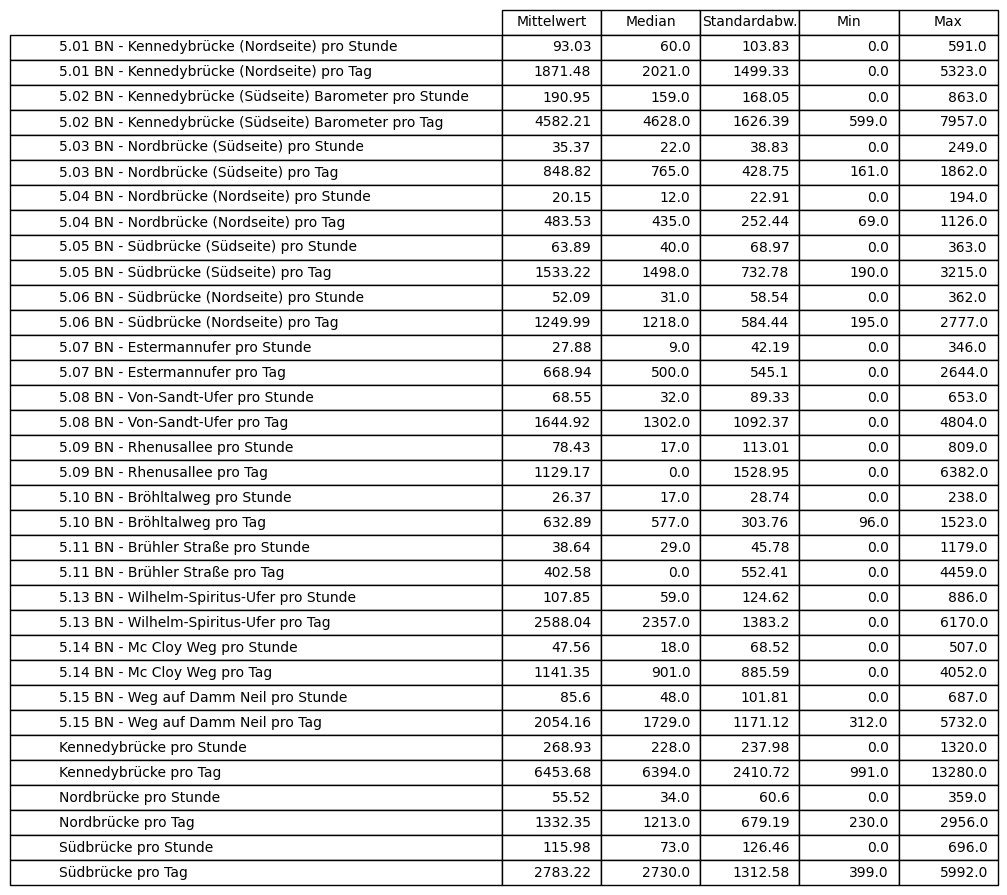

In [209]:
import matplotlib.gridspec as gridspec

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 
              'brown', 'pink', 'gray', 'olive', 'teal', 'navy', 'lime', 'gold', 'violet', 'blue']

all_dates = pd.date_range(start=df['days'].min(), end=df['days'].max())
all_rows = []
rows_labels = []
fig, ax = plt.subplots()

for name in df.columns:
    if name != 'time' and name != 'days':
        x_values_per_day = df.groupby('days')[name].sum()
        x_values_per_day = x_values_per_day.reindex(all_dates, fill_value=None)
        # Zellen für die Tabelle
        x_values_per_hour = df[name]
        cells_per_hour = [x_values_per_hour.mean(), x_values_per_hour.median(),
                          x_values_per_hour.std(), x_values_per_hour.min(), x_values_per_hour.max()]

        cells_per_day = [x_values_per_day.mean(), x_values_per_day.median(), 
                         x_values_per_day.std(), x_values_per_day.min(), x_values_per_day.max()]

        # Runde die Werte für die Tabelle
        cells_per_hour = [round(value, 2) for value in cells_per_hour]
        cells_per_day = [round(value, 2) for value in cells_per_day]
        all_rows.append(cells_per_hour)
        all_rows.append(cells_per_day)

        rows_labels.append('{} pro Stunde'.format(name))
        rows_labels.append('{} pro Tag'.format(name))

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
# Tabellenüberschriften
titles = ['Mittelwert', 'Median', 'Standardabw.', 'Min', 'Max']
# Tabelle erstellen
table =ax.table(cellText=all_rows, rowLabels=rows_labels, colLabels = titles,
                           loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)


In [214]:
values = df.isnull().any()
values

time                                            False
5.01 BN - Kennedybrücke (Nordseite)              True
5.02 BN - Kennedybrücke (Südseite) Barometer     True
5.03 BN - Nordbrücke (Südseite)                  True
5.04 BN - Nordbrücke (Nordseite)                 True
5.05 BN - Südbrücke (Südseite)                   True
5.06 BN - Südbrücke (Nordseite)                  True
5.07 BN - Estermannufer                          True
5.08 BN - Von-Sandt-Ufer                         True
5.09 BN - Rhenusallee                            True
5.10 BN - Bröhltalweg                            True
5.11 BN - Brühler Straße                         True
5.13 BN - Wilhelm-Spiritus-Ufer                  True
5.14 BN - Mc Cloy Weg                            True
5.15 BN - Weg auf Damm Neil                      True
Kennedybrücke                                    True
Nordbrücke                                       True
Südbrücke                                        True
days                        